# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

import plotly 
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ***1. Overview of the Problem***
Wine is an alcoholic beverage made with the fermented juice of grapes.
Several facets explain wine’s unique flavor: acidity, sweetness, alcohol, tannin, and aroma 
compounds produced in fermentation. So, what should a good wine look like? In what 
proportions should the things we use be used? We will examine these questions. And see we can predict the quality of alcohol without tasting it. 

# ***2. READING DATASET***

In [ ]:
wine =pd.read_csv('winequality-red.csv')

In [ ]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

time: 15 ms (started: 2023-01-17 12:43:39 +03:00)


In [ ]:
wine.shape

(1599, 12)

We have 1599 samples and 12 rows

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
cols = wine.columns 

In [ ]:
cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

These are out features


1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

In [ ]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values so we do not need to worry about it.

In [ ]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
wine.describe().transpose()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [ ]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

# ***3. DATA VISUALIZATION***

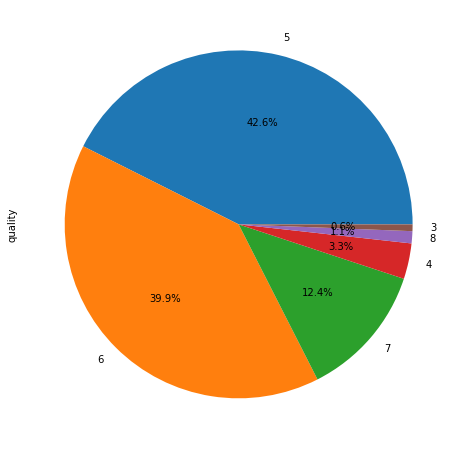

time: 212 ms (started: 2023-01-17 08:32:15 +00:00)


In [ ]:
#lets show the quality distribution
plt.figure(1, figsize=(8,8))
wine['quality'].value_counts().plot.pie(autopct="%1.1f%%")

The class distribution of the samples in the data set is uneven. Uneven class distribution is undesirable for machine learning models. The 'stratify' feature will be used, taking into account this imbalance while the dataset is allocated for training and testing.

<AxesSubplot: >

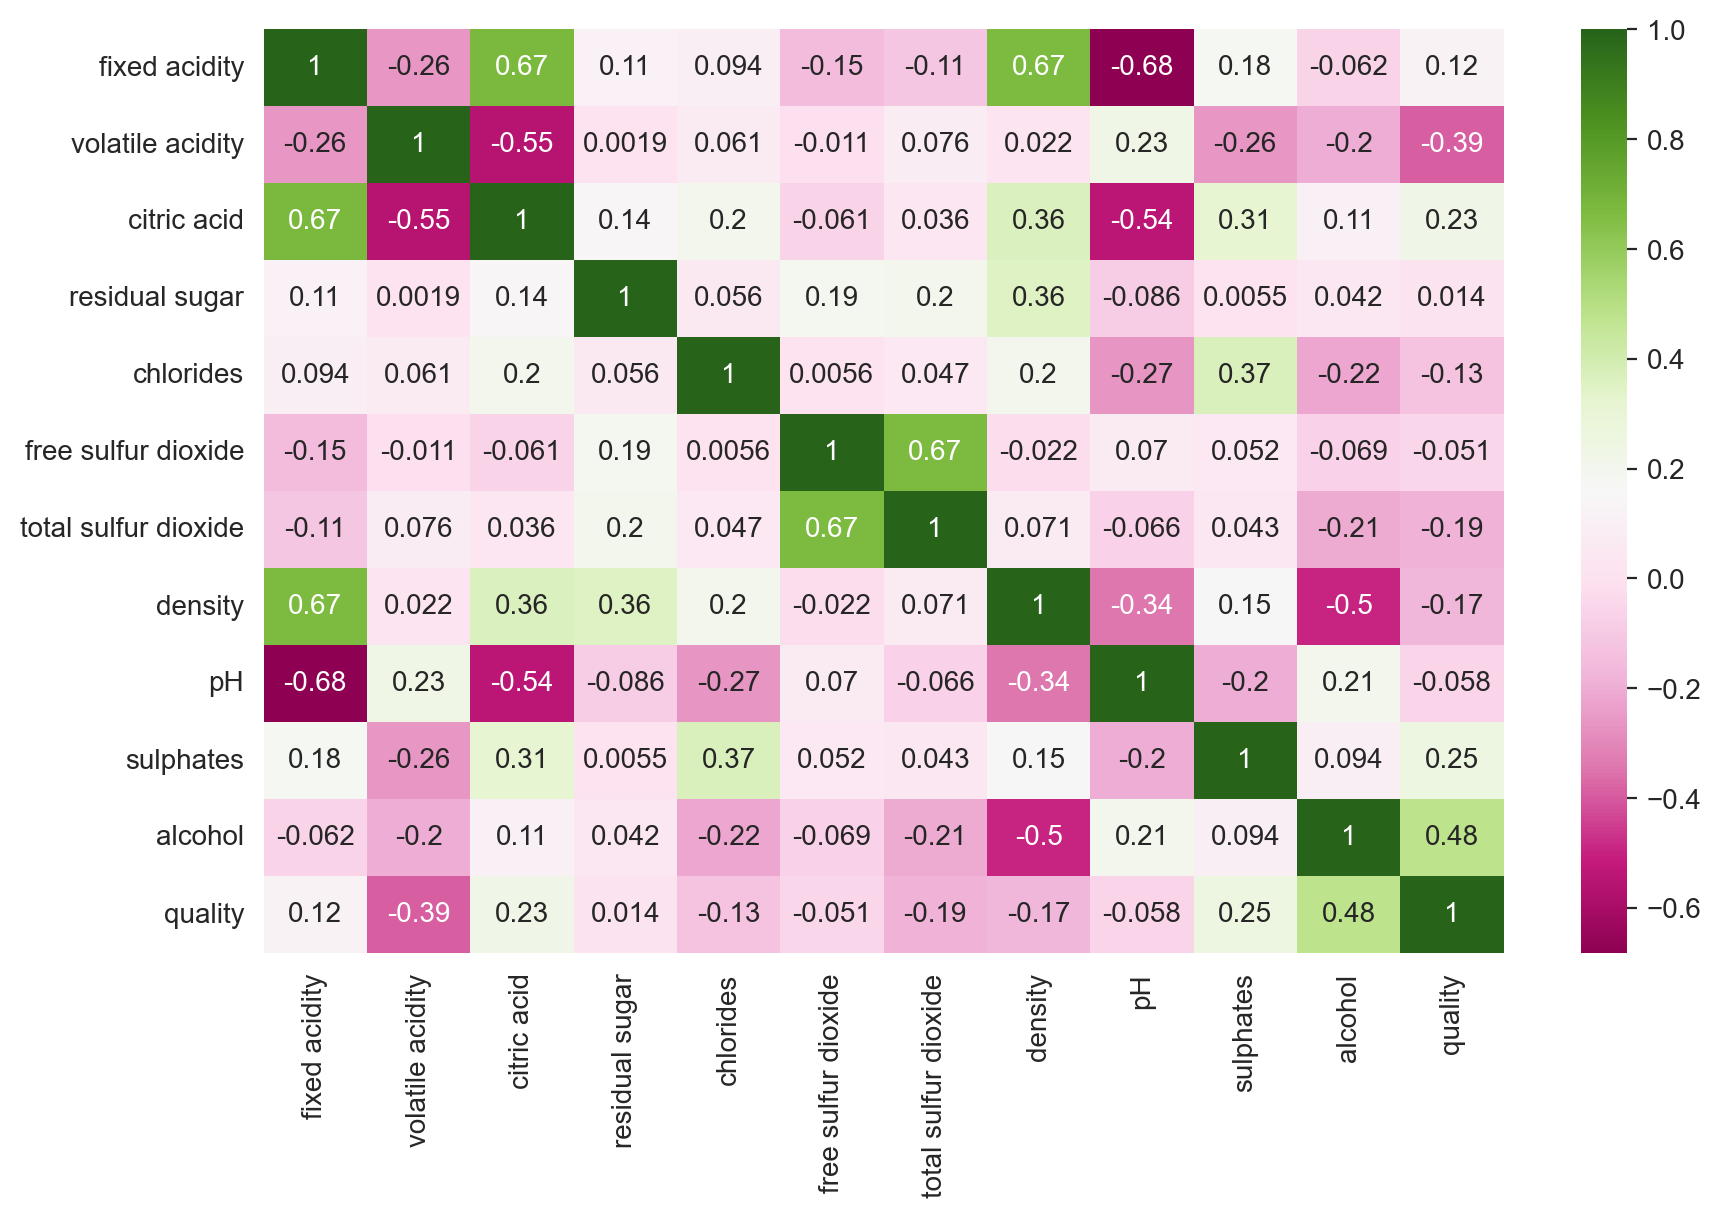

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(wine.corr(),cmap='PiYG',annot=True)

In [ ]:
wine.corr()['quality'].sort_values(ascending=False)[1:]


alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


*   The most positively correlated feature with quality is alcohol.
*   The most negatively correlated feature with quality is volatile acidity.



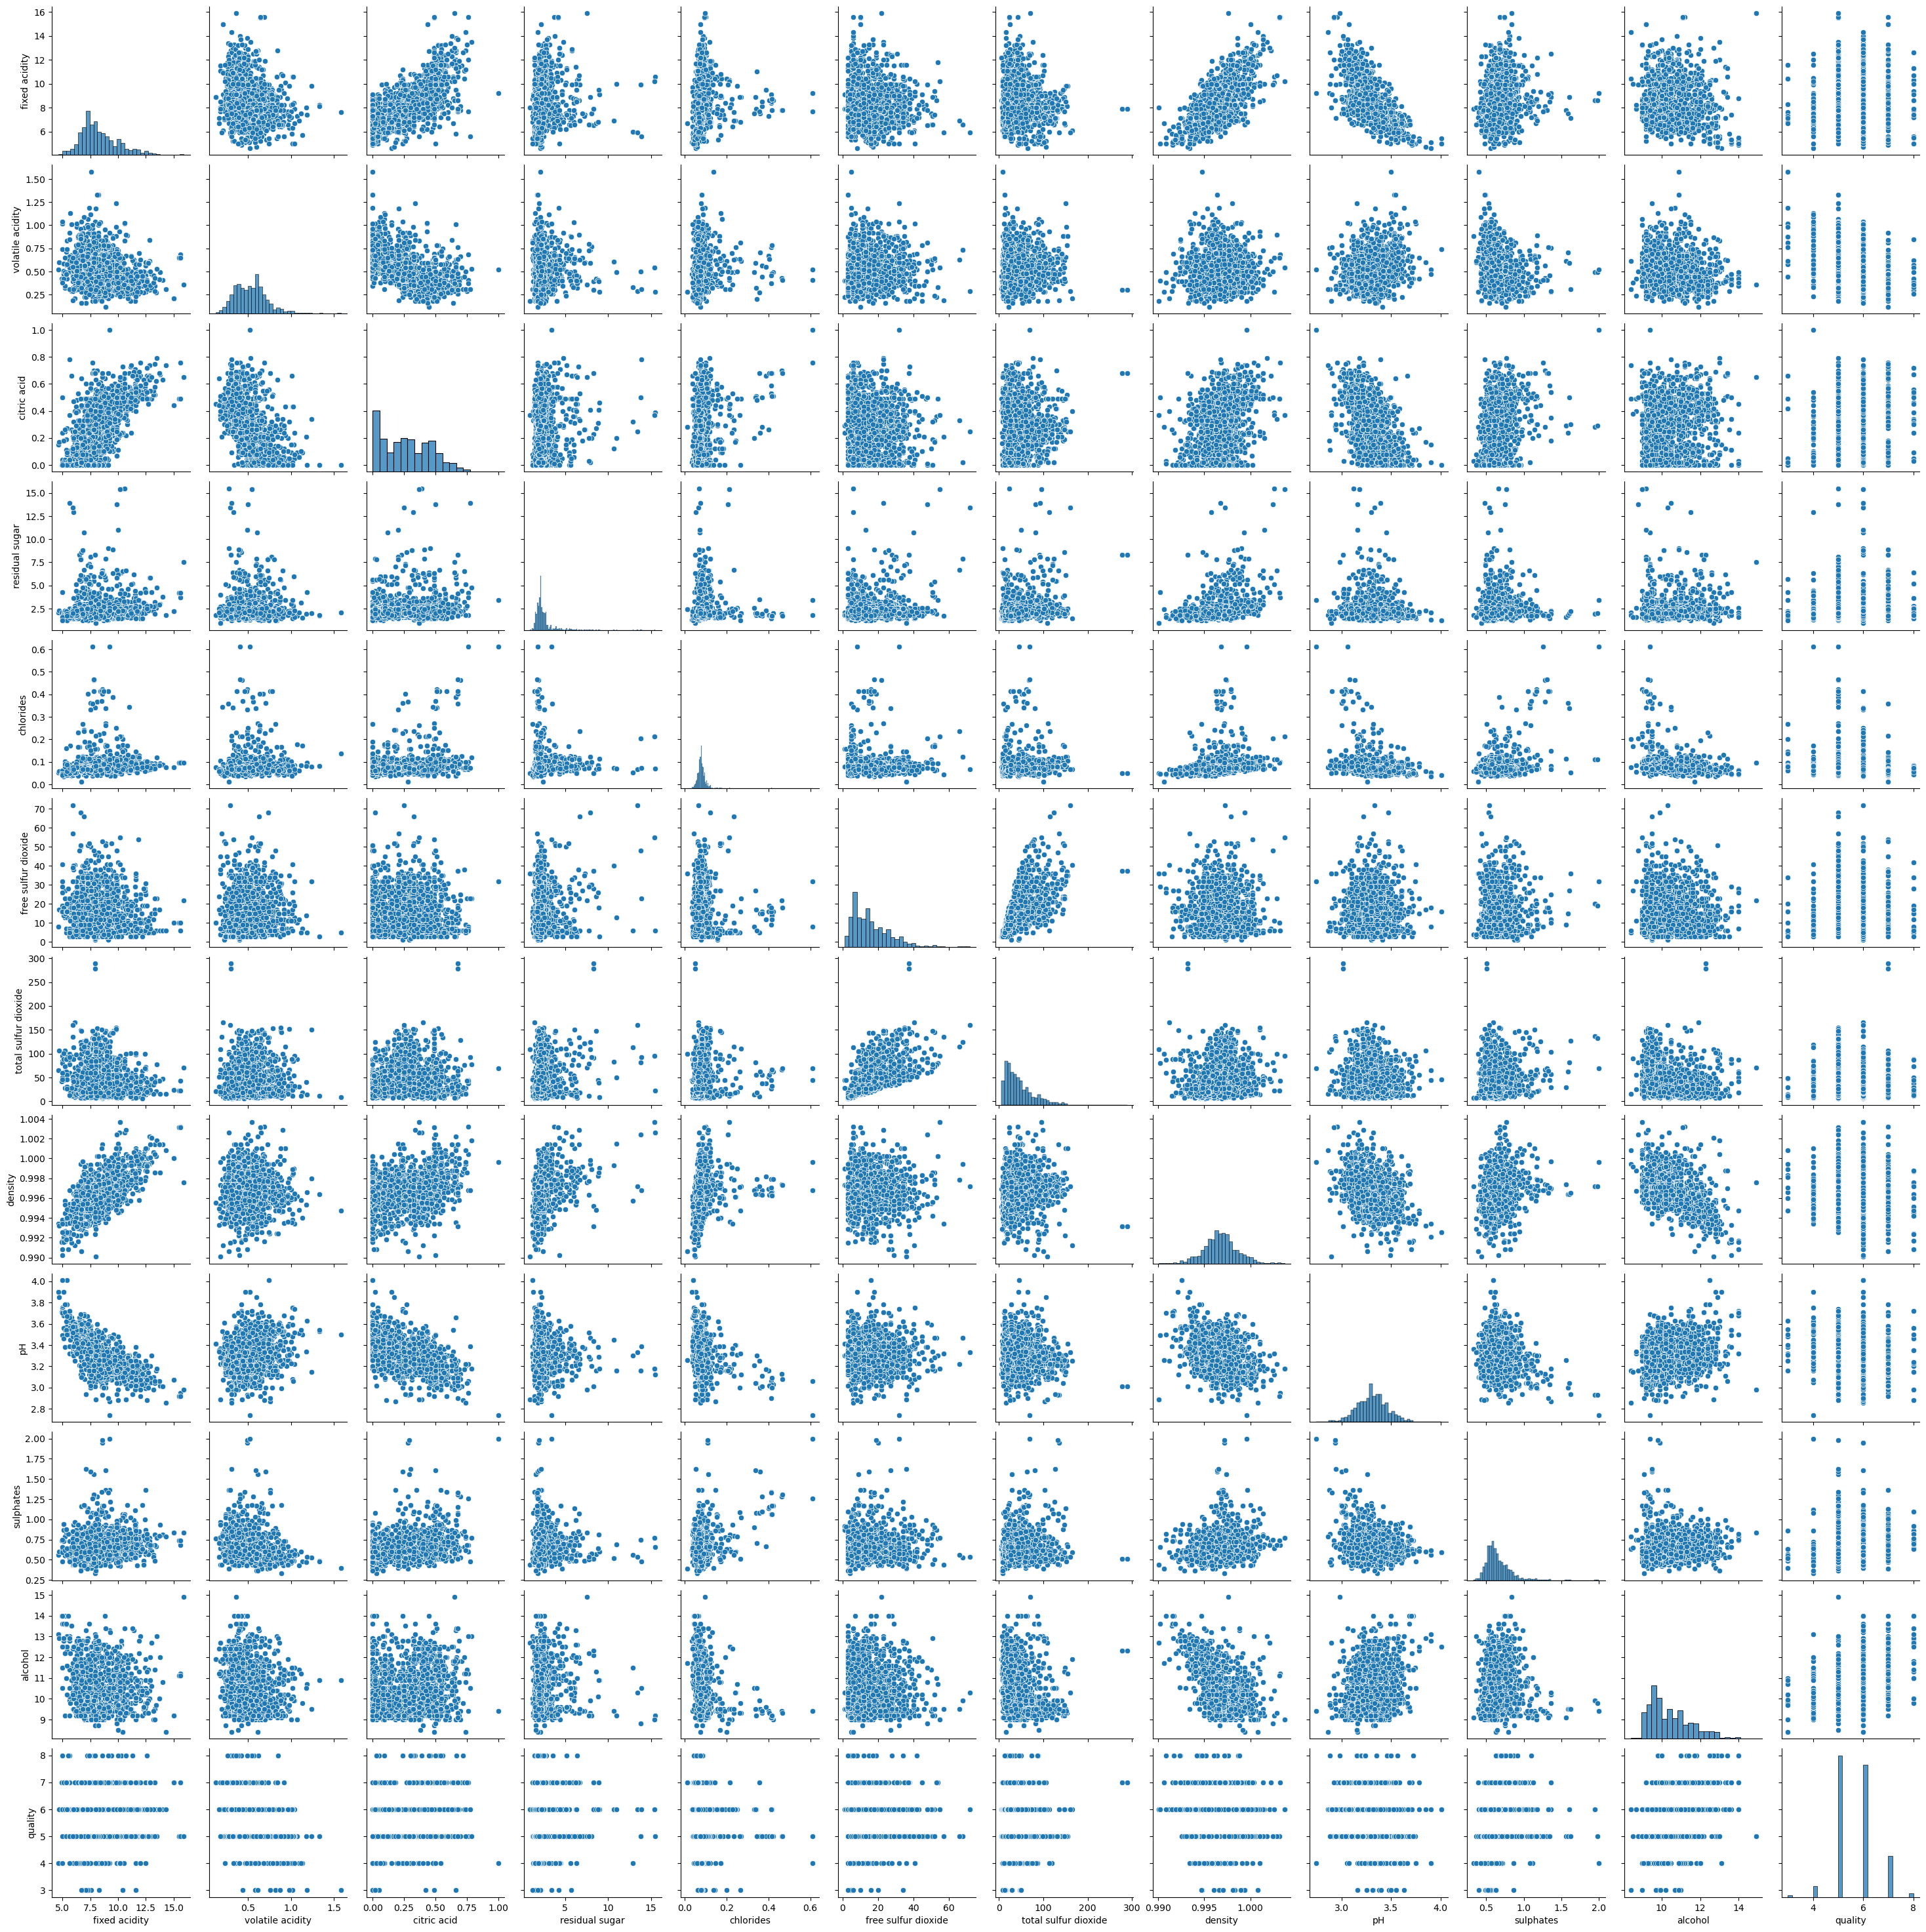

In [ ]:
sns.pairplot(wine)


As we have seen on the correlation table we can see here too some of the features are effects each other. For example density increases with fixed acidty, PH decreases with fixed acidty.

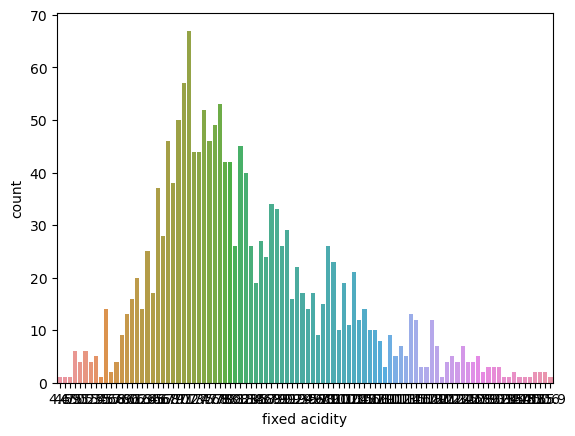

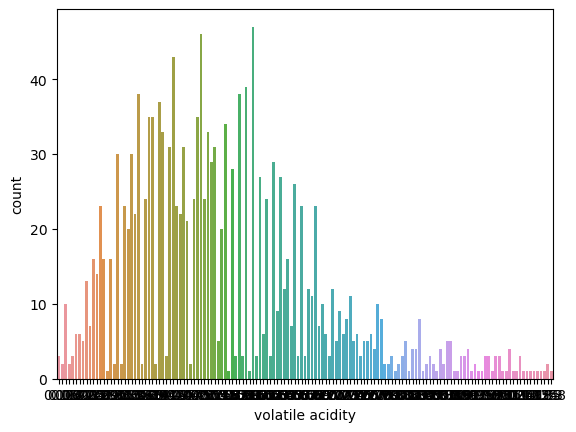

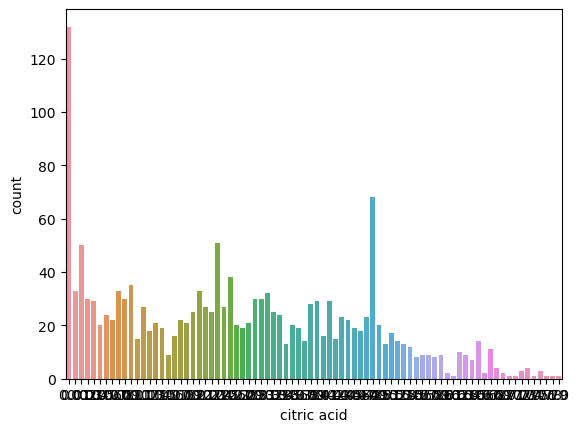

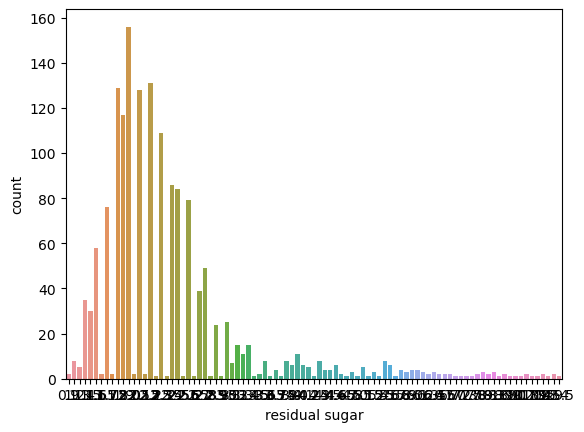

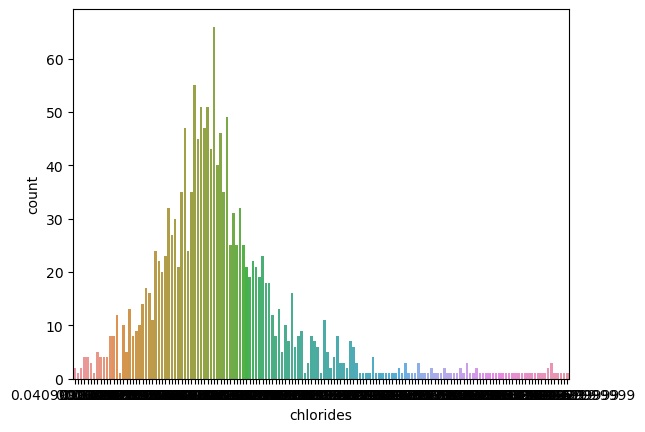

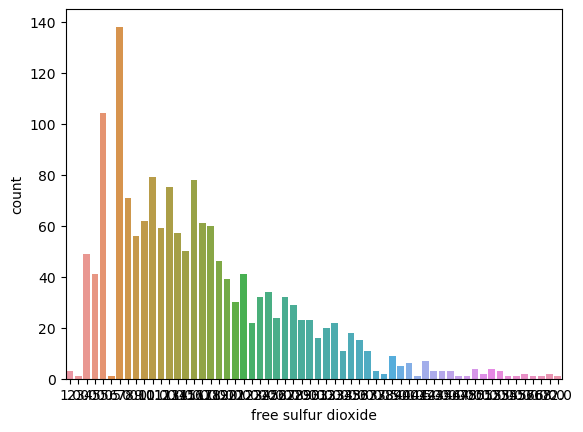

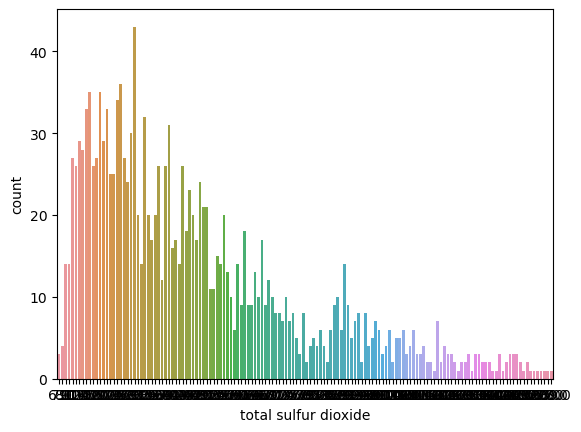

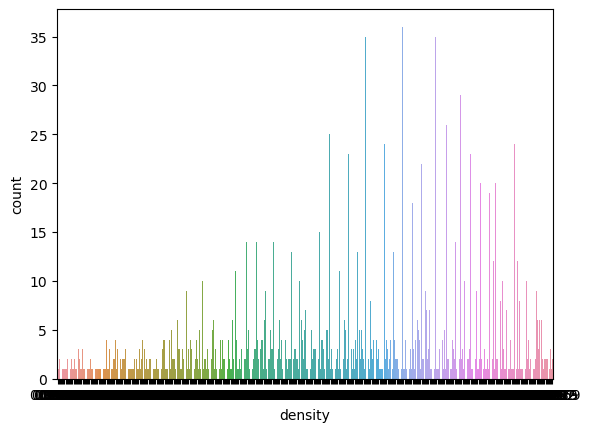

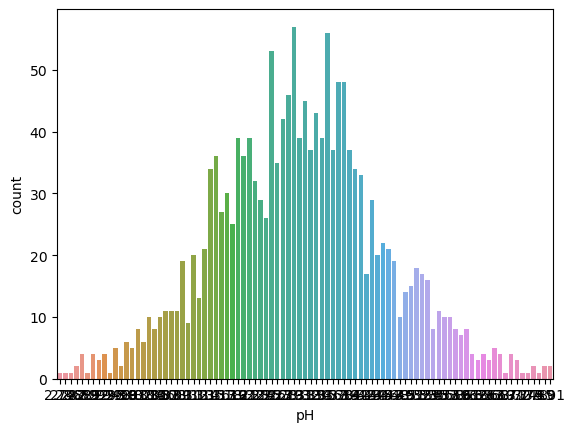

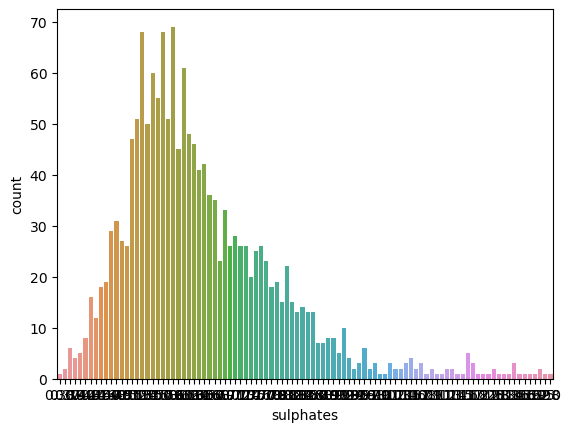

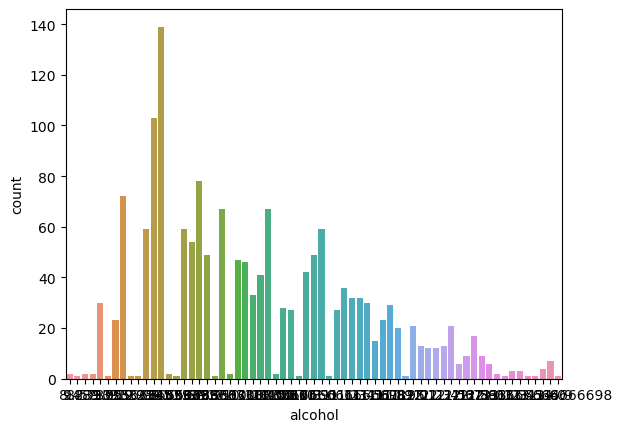

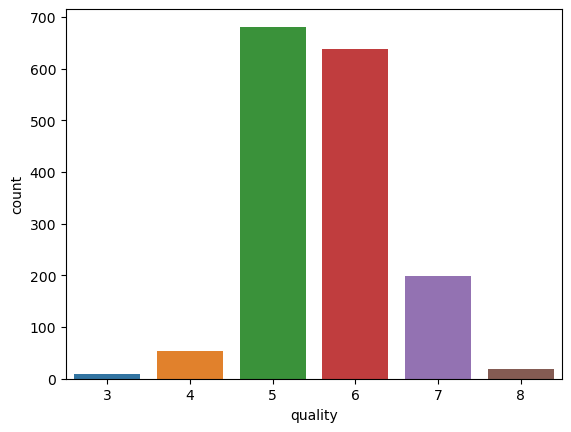

In [ ]:
for i in range(len(cols)):
    sns.countplot(data=wine,x=cols[i])
    plt.show()


All of them has gaussian distribution. This is fine.

<AxesSubplot: xlabel='pH', ylabel='quality'>

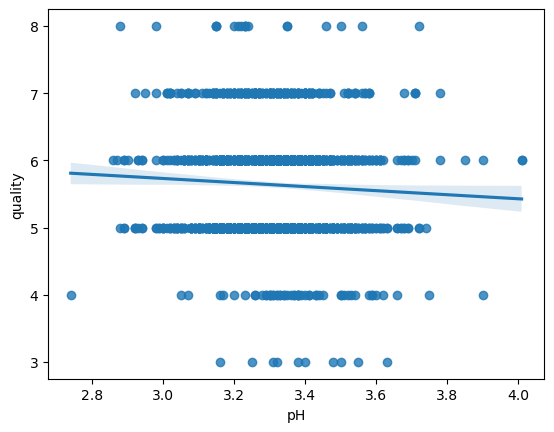

In [ ]:
sns.regplot(data=wine,x='pH',y="quality")


In [ ]:
fig = px.violin(wine,x='quality',y='fixed acidity',title='Fixed acidity not givng any specifications about quality')
fig.show()

time: 1.42 s (started: 2023-01-17 08:50:48 +00:00)


In [ ]:
fig = px.violin(wine,x='quality',y='volatile acidity',title='Quality improves as volatile acidity composition decreases')
fig.show()

time: 59.8 ms (started: 2023-01-17 08:50:56 +00:00)


Text(0.5, 1.0, 'Quality goes higher as Critic acid increases')

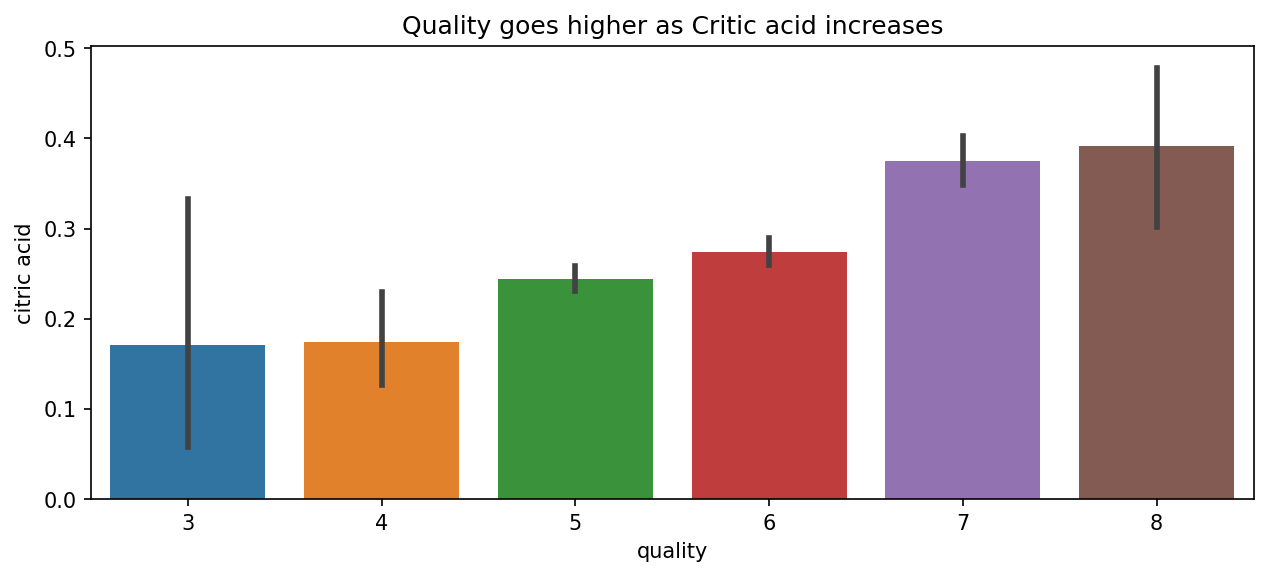

time: 580 ms (started: 2023-01-17 08:51:03 +00:00)


In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.title('Quality goes higher as Critic acid increases')

Text(0.5, 1.0, 'Composition of Chloride descends as Quality improves')

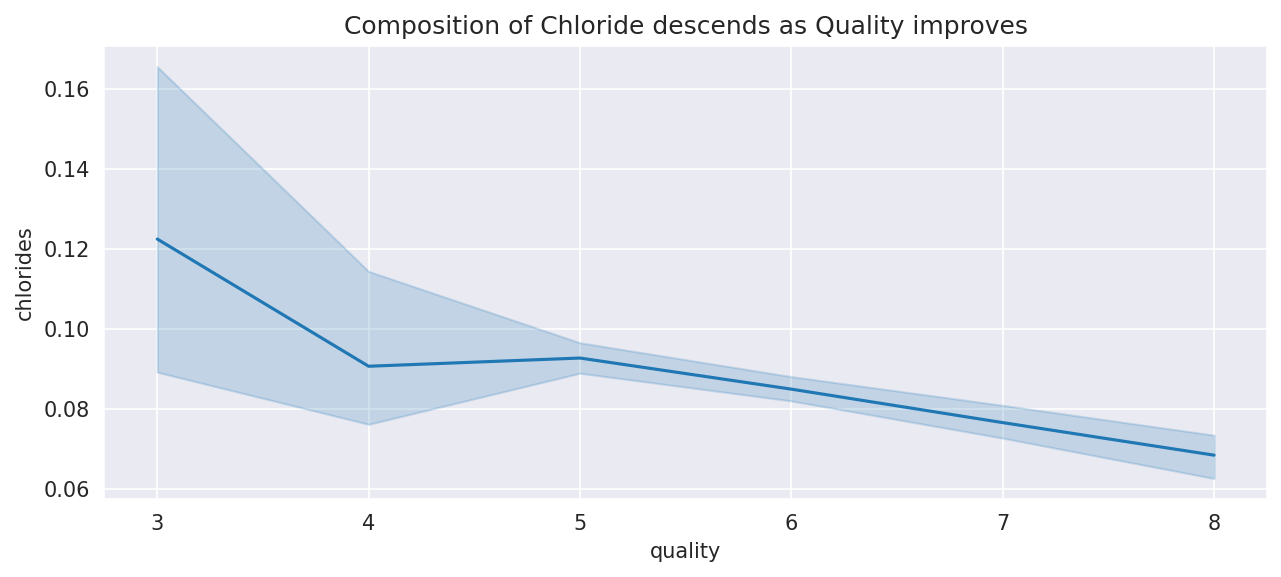

time: 610 ms (started: 2023-01-17 08:51:08 +00:00)


In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4),dpi=150)
sns.lineplot(x = 'quality', y = 'chlorides', data = wine)
plt.title('Composition of Chloride descends as Quality improves')

Text(0.5, 1.0, 'Sulphates level goes higher with the quality of wine')

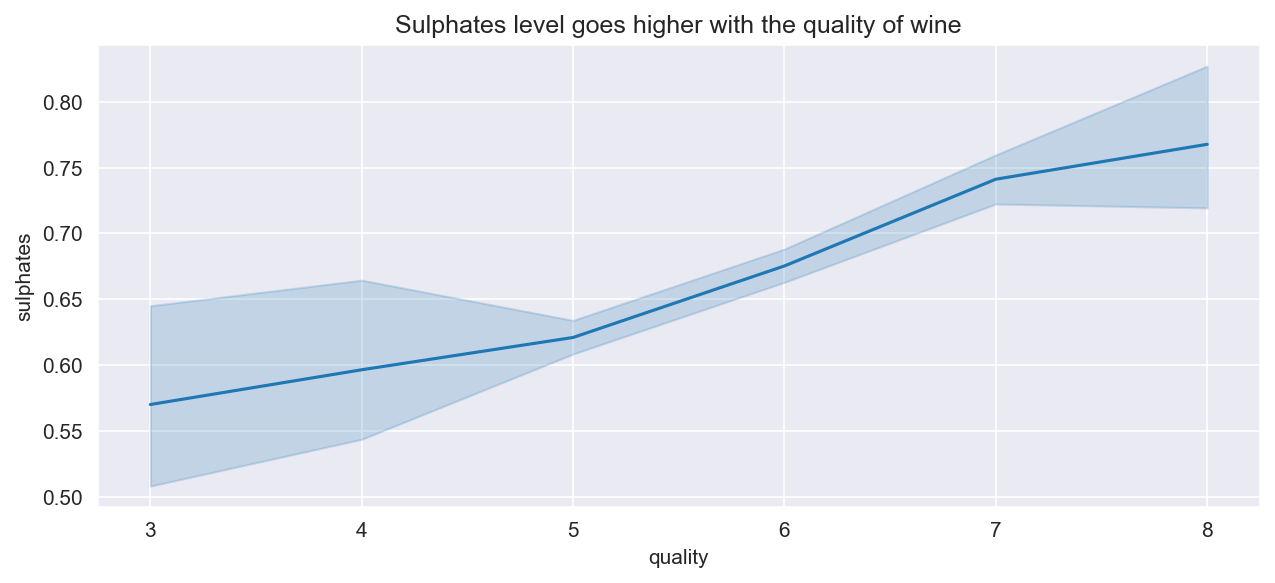

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.lineplot(x = 'quality', y = 'sulphates', data = wine)
plt.title('Sulphates level goes higher with the quality of wine')

Text(0.5, 1.0, 'Alcohol level goes higher with the quality of wine')

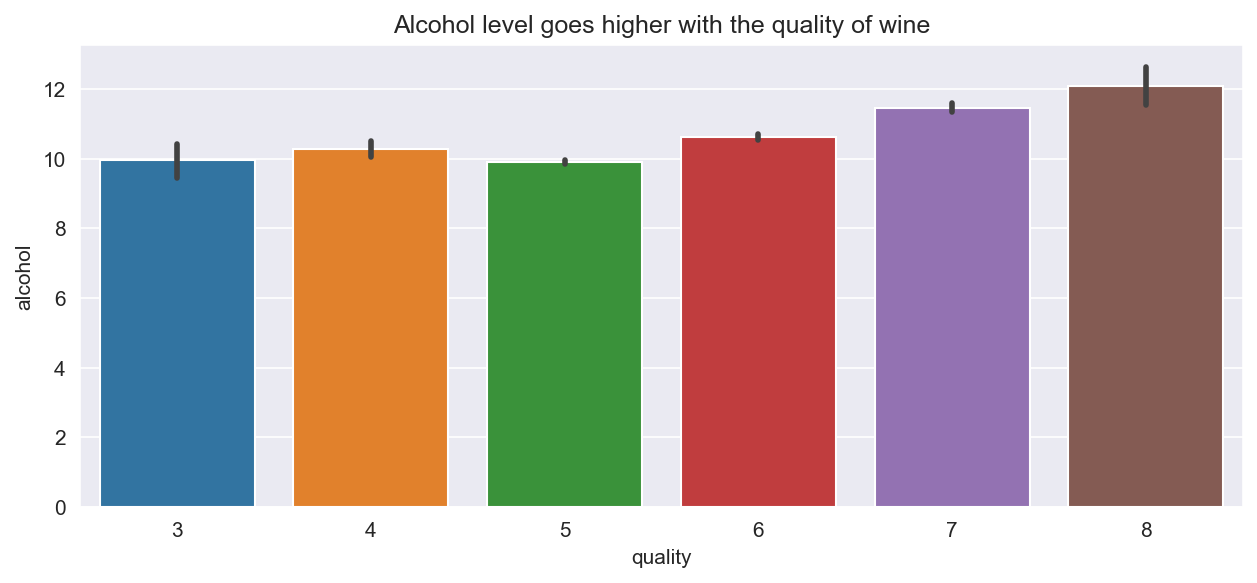

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.title('Alcohol level goes higher with the quality of wine')

Comments that can be made by looking at the visualization we made above.

*   The most positively correlated feature with quality is alcohol.
*   The most negatively correlated feature with quality is volatile acidity.
*   The class distribution of the samples in the data set is uneven. 
*   The average alcohol value increases as the quality level increases, albeit slightly.
*   The average volatile acidity value decreases as the quality level increases.
*   The mean sulphates value decreases as the quality level increases.
*   Although the average residual sugar and total sulfur dioxide values ​​differ according to the quality level, they do not have an increasing or decreasing relationship with the quality level.
*   Sulphates level goes higher with the quality of wine
*   Composition of Chloride descends as Quality improves
*   Quality goes higher as Critic acid increases
*   Fixed acidity not givng any specifications about quality








# ***4. Train Validation Test split and Preprocessing***

Lets split the data into X and y and normalize the X values

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine['quality']
X = StandardScaler().fit_transform(X) #normalization

Lets split the data into
%75 Train
%15 Validation
10 Test

In [ ]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y , test_size=1 - train_ratio, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), stratify=y_test, random_state=42) 

<AxesSubplot:title={'center':'Each quality Distribution on Training'}, xlabel='quality'>

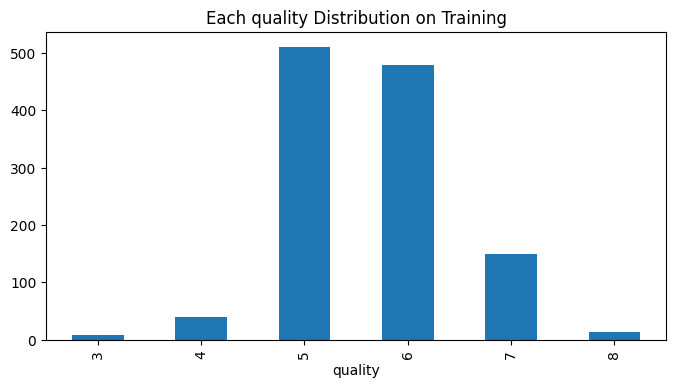

In [ ]:
y_frame=pd.DataFrame()
y_frame['quality']=y_train
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,4),
                                                     title="Each quality Distribution on Training")

<AxesSubplot:title={'center':'Each quality Distribution on Validation'}, xlabel='quality'>

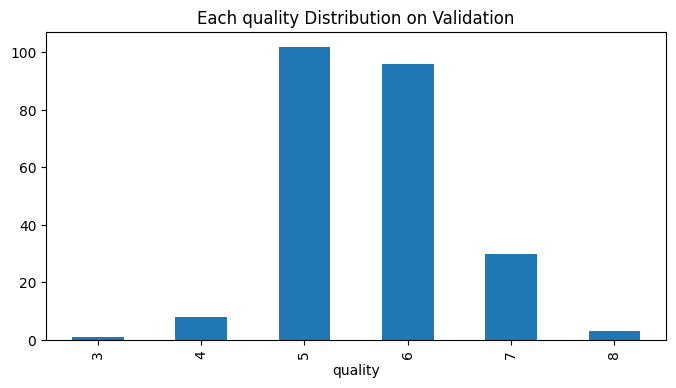

In [ ]:
y_frame=pd.DataFrame()
y_frame['quality']=y_val
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,4),
                                                     title="Each quality Distribution on Validation")

<AxesSubplot:title={'center':'Each quality Distribution on Testing'}, xlabel='quality'>

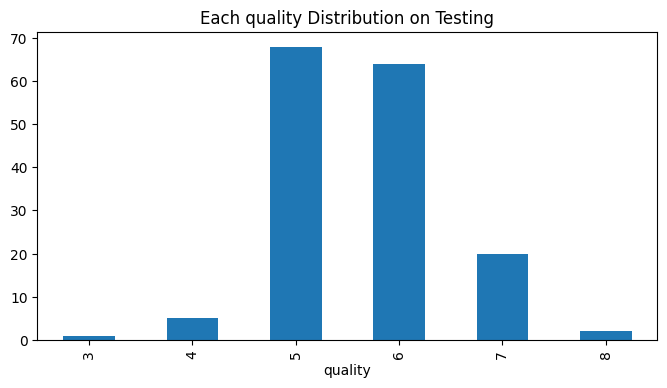

In [ ]:
y_frame=pd.DataFrame()
y_frame['quality']=y_test
y_frame.groupby(['quality']).size().plot.bar(figsize=(8,4),
                                                     title="Each quality Distribution on Testing")

In [ ]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-01-17 12:44:22 +03:00)


Lets train with different models.

# 5.Classification Models

# 5.1 Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

time: 15 ms (started: 2023-01-17 13:01:06 +03:00)


In [ ]:
y_pred = clf.predict(x_val)

time: 0 ns (started: 2023-01-17 13:01:09 +03:00)


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.15      0.25      0.19         8
           5       0.70      0.68      0.69       102
           6       0.62      0.64      0.63        96
           7       0.57      0.53      0.55        30
           8       0.50      0.33      0.40         3

    accuracy                           0.62       240
   macro avg       0.42      0.40      0.41       240
weighted avg       0.63      0.62      0.62       240

time: 0 ns (started: 2023-01-17 13:01:09 +03:00)


# 5.2 KNN Classifier

time: 971 µs (started: 2023-01-17 09:09:48 +00:00)


In [ ]:
error_rate = []
# Will take some time
for i in range(3,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_val)
  error_rate.append(np.mean(pred_i != y_val))

time: 1.7 s (started: 2023-01-17 12:45:04 +03:00)


Text(0, 0.5, 'Error Rate')

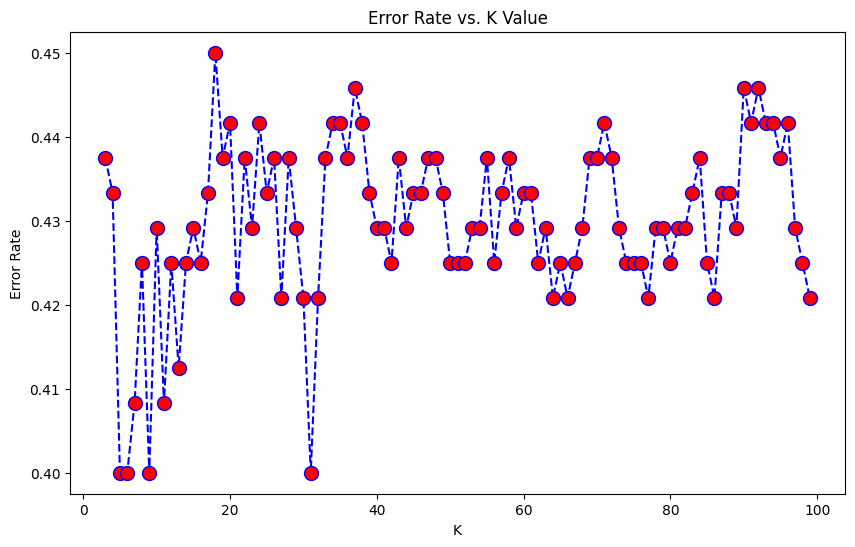

time: 203 ms (started: 2023-01-17 12:45:12 +03:00)


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(3,100),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

time: 15 ms (started: 2023-01-17 12:45:49 +03:00)


In [ ]:
y_pred = knn.predict(x_val)

time: 16 ms (started: 2023-01-17 12:45:56 +03:00)


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.64      0.68      0.66       102
           6       0.51      0.61      0.56        96
           7       0.53      0.30      0.38        30
           8       0.00      0.00      0.00         3

    accuracy                           0.57       240
   macro avg       0.28      0.27      0.27       240
weighted avg       0.54      0.57      0.55       240

time: 16 ms (started: 2023-01-17 12:46:00 +03:00)


# 5.3 SVC

In [ ]:
best_score=0
gammas=[0.001, 0.01, 0.1, 1, 10, 100]
Cs=[0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gammas:
    for C in Cs:
        svm=SVC(kernel='rbf',gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        
        
        score=svm.score(x_val, y_val)
        
        if score>best_score:
            y_pred=svm.predict(x_val)
            best_score=score
            best_params={'C':C, 'gamma':gamma}
    
print("best score:",best_score)
print("best params:",best_params)
print("classification reports:\n",classification_report(y_val, y_pred))

best score: 0.6666666666666666
best params: {'C': 100, 'gamma': 1}
classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.71      0.76      0.74       102
           6       0.62      0.72      0.66        96
           7       0.75      0.40      0.52        30
           8       1.00      0.33      0.50         3

    accuracy                           0.67       240
   macro avg       0.51      0.37      0.40       240
weighted avg       0.65      0.67      0.65       240

time: 5.12 s (started: 2023-01-17 12:46:14 +03:00)


In [ ]:
svm=SVC(kernel='rbf',gamma=1, C=100)
svm.fit(x_train, y_train)

SVC(C=100, gamma=1)

time: 141 ms (started: 2023-01-17 12:58:19 +03:00)


In [ ]:
y_pred=svm.predict(x_val)

time: 31 ms (started: 2023-01-17 12:58:21 +03:00)


In [ ]:
print("classification reports:\n",classification_report(y_val, y_pred))

classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.71      0.76      0.74       102
           6       0.62      0.72      0.66        96
           7       0.75      0.40      0.52        30
           8       1.00      0.33      0.50         3

    accuracy                           0.67       240
   macro avg       0.51      0.37      0.40       240
weighted avg       0.65      0.67      0.65       240

time: 15 ms (started: 2023-01-17 12:58:22 +03:00)


# 5.4 Random Forest

In [ ]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

time: 47 ms (started: 2023-01-17 13:01:28 +03:00)


In [ ]:
y_pred=clf.predict(x_val)

time: 0 ns (started: 2023-01-17 13:01:28 +03:00)


In [ ]:
print("classification reports:\n",classification_report(y_val, y_pred))

classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.73      0.78      0.76       102
           6       0.62      0.71      0.66        96
           7       0.65      0.43      0.52        30
           8       1.00      0.33      0.50         3

    accuracy                           0.68       240
   macro avg       0.50      0.38      0.41       240
weighted avg       0.65      0.68      0.66       240

time: 16 ms (started: 2023-01-17 13:01:29 +03:00)


# 5.5 AdaBoost

In [ ]:
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10)

time: 31 ms (started: 2023-01-17 12:48:17 +03:00)


In [ ]:
y_pred = clf.predict(x_val)

time: 0 ns (started: 2023-01-17 12:48:19 +03:00)


In [ ]:
print("classification reports:\n",classification_report(y_val, y_pred))

classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.59      0.71      0.64       102
           6       0.50      0.54      0.52        96
           7       0.38      0.17      0.23        30
           8       0.00      0.00      0.00         3

    accuracy                           0.54       240
   macro avg       0.25      0.24      0.23       240
weighted avg       0.50      0.54      0.51       240

time: 0 ns (started: 2023-01-17 12:48:21 +03:00)


# 5.6 CatBoost

In [ ]:
model = CatBoostClassifier(iterations=100,loss_function='MultiClass')
model.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 1.2760218	total: 156ms	remaining: 15.4s
1:	learn: 1.1278154	total: 161ms	remaining: 7.91s
2:	learn: 1.0216860	total: 166ms	remaining: 5.38s
3:	learn: 0.9646113	total: 173ms	remaining: 4.16s
4:	learn: 0.9178273	total: 180ms	remaining: 3.42s
5:	learn: 0.8823533	total: 186ms	remaining: 2.91s
6:	learn: 0.8531936	total: 191ms	remaining: 2.53s
7:	learn: 0.8252185	total: 196ms	remaining: 2.25s
8:	learn: 0.8039704	total: 203ms	remaining: 2.06s
9:	learn: 0.7915082	total: 213ms	remaining: 1.91s
10:	learn: 0.7794605	total: 218ms	remaining: 1.76s
11:	learn: 0.7614644	total: 224ms	remaining: 1.64s
12:	learn: 0.7458849	total: 230ms	remaining: 1.54s
13:	learn: 0.7318317	total: 237ms	remaining: 1.46s
14:	learn: 0.7199535	total: 245ms	remaining: 1.39s
15:	learn: 0.6991589	total: 250ms	remaining: 1.31s
16:	learn: 0.6936015	total: 256ms	remaining: 1.25s
17:	learn: 0.6781549	total: 261ms	remaining: 1.19s
18:	learn: 0.6626861	total: 269ms	remaining: 1.14s
19:	learn: 0.655

time: 844 ms (started: 2023-01-17 12:48:44 +03:00)


In [ ]:
y_pred = model.predict(x_val)

time: 0 ns (started: 2023-01-17 12:48:56 +03:00)


In [ ]:
print("classification reports:\n",classification_report(y_val, y_pred))

classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.74      0.74      0.74       102
           6       0.63      0.70      0.66        96
           7       0.67      0.60      0.63        30
           8       1.00      0.33      0.50         3

    accuracy                           0.67       240
   macro avg       0.50      0.39      0.42       240
weighted avg       0.66      0.67      0.66       240

time: 0 ns (started: 2023-01-17 12:48:58 +03:00)


# 6.Regression Models

# 6.1 KNN Regressor

In [ ]:
error_rate = []
# Will take some time
for i in range(3,100):
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(x_train, y_train)
  y_pred = neigh.predict(x_val)
  error = sqrt(mean_squared_error(y_val,y_pred)) #calculate rmse
  error_rate.append(error) #store rmse values

time: 1.06 s (started: 2023-01-17 13:04:37 +03:00)


Text(0, 0.5, 'Error Rate')

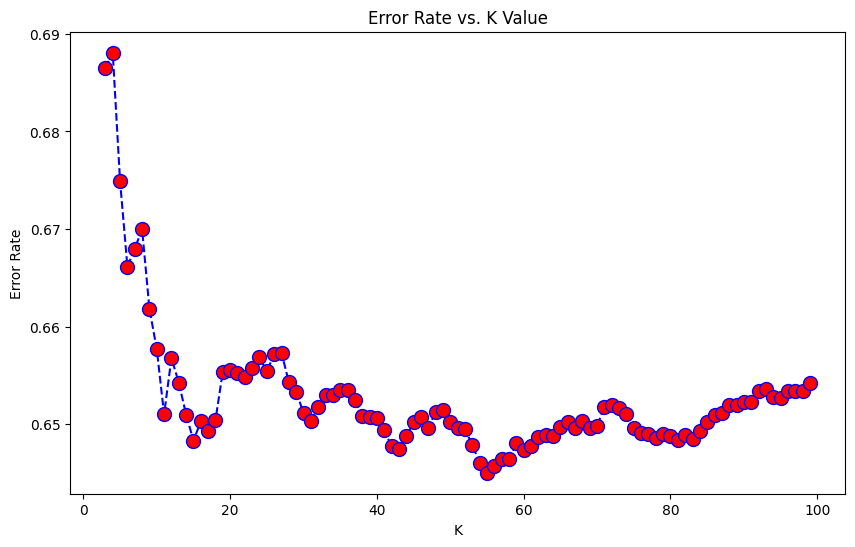

time: 172 ms (started: 2023-01-17 13:04:39 +03:00)


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(3,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=18)
neigh.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=18)

time: 0 ns (started: 2023-01-17 13:04:51 +03:00)


In [ ]:
y_pred = neigh.predict(x_val)

time: 0 ns (started: 2023-01-17 13:04:52 +03:00)


In [ ]:
print(r2_score(y_val, y_pred))

0.3445216568283147
time: 0 ns (started: 2023-01-17 13:04:54 +03:00)


# 6.2 CatBoost Regressor

In [ ]:
# Initialize data


# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=1000,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(x_train, y_train)

0:	learn: 0.7006021	total: 1.28ms	remaining: 1.28s
1:	learn: 0.6817964	total: 2.05ms	remaining: 1.02s
2:	learn: 0.6658812	total: 2.52ms	remaining: 838ms
3:	learn: 0.6514591	total: 2.99ms	remaining: 744ms
4:	learn: 0.6498310	total: 3.52ms	remaining: 700ms
5:	learn: 0.6399879	total: 4.17ms	remaining: 691ms
6:	learn: 0.6355667	total: 4.77ms	remaining: 677ms
7:	learn: 0.6298038	total: 5.3ms	remaining: 658ms
8:	learn: 0.6253544	total: 5.83ms	remaining: 642ms
9:	learn: 0.6237716	total: 6.25ms	remaining: 619ms
10:	learn: 0.6189760	total: 6.78ms	remaining: 610ms
11:	learn: 0.6151308	total: 7.38ms	remaining: 607ms
12:	learn: 0.6102019	total: 7.9ms	remaining: 600ms
13:	learn: 0.6045449	total: 8.36ms	remaining: 589ms
14:	learn: 0.5998687	total: 9.01ms	remaining: 592ms
15:	learn: 0.5978006	total: 9.61ms	remaining: 591ms
16:	learn: 0.5926673	total: 10.1ms	remaining: 582ms
17:	learn: 0.5914523	total: 10.5ms	remaining: 571ms
18:	learn: 0.5894006	total: 10.9ms	remaining: 564ms
19:	learn: 0.5835162	tot

372:	learn: 0.2458128	total: 181ms	remaining: 304ms
373:	learn: 0.2453361	total: 182ms	remaining: 304ms
374:	learn: 0.2451232	total: 182ms	remaining: 304ms
375:	learn: 0.2449063	total: 183ms	remaining: 303ms
376:	learn: 0.2445744	total: 183ms	remaining: 303ms
377:	learn: 0.2439571	total: 184ms	remaining: 302ms
378:	learn: 0.2434738	total: 184ms	remaining: 302ms
379:	learn: 0.2433978	total: 185ms	remaining: 301ms
380:	learn: 0.2428530	total: 185ms	remaining: 300ms
381:	learn: 0.2425952	total: 185ms	remaining: 300ms
382:	learn: 0.2422314	total: 186ms	remaining: 299ms
383:	learn: 0.2417928	total: 186ms	remaining: 299ms
384:	learn: 0.2412890	total: 187ms	remaining: 298ms
385:	learn: 0.2408028	total: 187ms	remaining: 298ms
386:	learn: 0.2406914	total: 188ms	remaining: 297ms
387:	learn: 0.2401494	total: 189ms	remaining: 298ms
388:	learn: 0.2395137	total: 190ms	remaining: 298ms
389:	learn: 0.2386210	total: 190ms	remaining: 297ms
390:	learn: 0.2384399	total: 191ms	remaining: 297ms
391:	learn: 

699:	learn: 0.1541692	total: 352ms	remaining: 151ms
700:	learn: 0.1541026	total: 352ms	remaining: 150ms
701:	learn: 0.1539078	total: 353ms	remaining: 150ms
702:	learn: 0.1536648	total: 354ms	remaining: 149ms
703:	learn: 0.1532859	total: 355ms	remaining: 149ms
704:	learn: 0.1532124	total: 355ms	remaining: 149ms
705:	learn: 0.1530984	total: 356ms	remaining: 148ms
706:	learn: 0.1530476	total: 357ms	remaining: 148ms
707:	learn: 0.1530040	total: 357ms	remaining: 147ms
708:	learn: 0.1528267	total: 358ms	remaining: 147ms
709:	learn: 0.1527990	total: 358ms	remaining: 146ms
710:	learn: 0.1527471	total: 359ms	remaining: 146ms
711:	learn: 0.1524553	total: 359ms	remaining: 145ms
712:	learn: 0.1521707	total: 360ms	remaining: 145ms
713:	learn: 0.1520667	total: 360ms	remaining: 144ms
714:	learn: 0.1519730	total: 361ms	remaining: 144ms
715:	learn: 0.1517403	total: 362ms	remaining: 144ms
716:	learn: 0.1515876	total: 364ms	remaining: 144ms
717:	learn: 0.1513756	total: 365ms	remaining: 143ms
718:	learn: 

time: 672 ms (started: 2023-01-17 13:04:42 +03:00)


In [ ]:
# Get predictions
y_pred = model.predict(x_val)

time: 0 ns (started: 2023-01-17 13:04:43 +03:00)


In [ ]:
print(r2_score(y_val, y_pred))

0.24279677064220084
time: 0 ns (started: 2023-01-17 13:04:43 +03:00)


# 6.2 Linear Regressor

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

time: 0 ns (started: 2023-01-17 13:04:43 +03:00)


In [ ]:
y_pred = reg.predict(x_val)

time: 0 ns (started: 2023-01-17 13:04:43 +03:00)


In [ ]:
print(r2_score(y_val, y_pred))

0.3328558082640476
time: 0 ns (started: 2023-01-17 13:04:44 +03:00)


# 7.Comparison of Models

In [ ]:
clfs = pd.read_excel('classification_results.xlsx')

time: 359 ms (started: 2023-01-17 13:09:22 +03:00)


In [ ]:
clfs

Model  Train Time  Test Time  Accuracy
0  Decision Tree          15          0      0.62
1            KNN          15         16      0.57
2            SVC         141         31      0.67
3  Random Forest          47          0      0.68
4      Ada Boost          31          0      0.54
5      Cat Boost         844          0      0.67

time: 0 ns (started: 2023-01-17 13:09:31 +03:00)


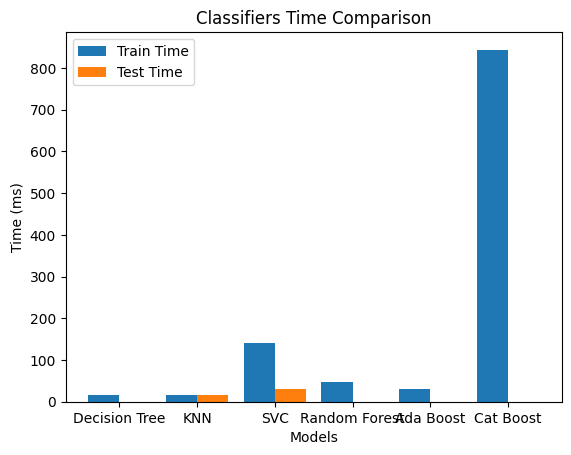

time: 125 ms (started: 2023-01-17 13:12:12 +03:00)


In [ ]:
X = clfs['Model']
Train_t = clfs['Train Time']
Test_t = clfs['Test Time']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Train_t, 0.4, label = 'Train Time')
plt.bar(X_axis + 0.2, Test_t, 0.4, label = 'Test Time')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Time (ms)")
plt.title("Classifiers Time Comparison")
plt.legend()
plt.show()

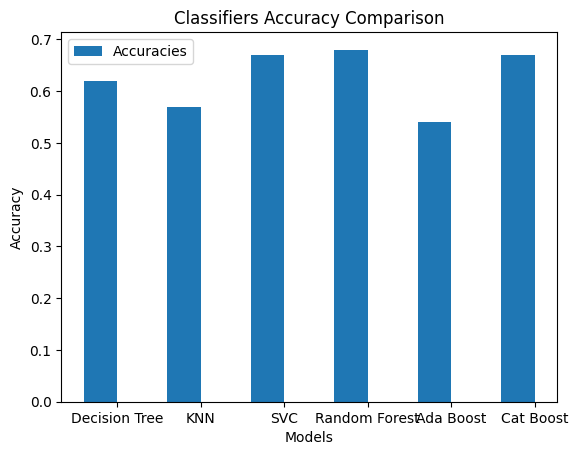

time: 93 ms (started: 2023-01-17 13:13:51 +03:00)


In [ ]:
X = clfs['Model']
accuracies = clfs['Accuracy']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, accuracies, 0.4, label = 'Accuracies')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Classifiers Accuracy Comparison")
plt.legend()
plt.show()

In [ ]:
rgrs = pd.read_excel('regression_results.xlsx')
rgrs

Model  Train Time  Test Time    R2
0        KNN           0          0  0.34
1     Linear           0          0  0.33
2  Cat Boost           0          0  0.24

time: 16 ms (started: 2023-01-17 13:16:20 +03:00)


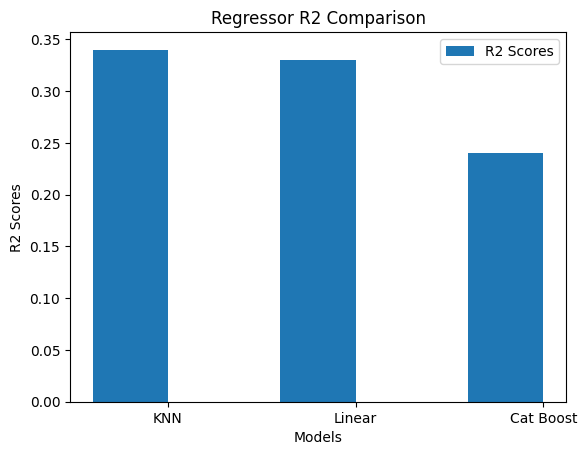

time: 94 ms (started: 2023-01-17 13:16:21 +03:00)


In [ ]:
X = rgrs['Model']
accuracies = rgrs['R2']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, accuracies, 0.4, label = 'R2 Scores')
  
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("R2 Scores")
plt.title("Regressor R2 Comparison")
plt.legend()
plt.show()

# 8.Best Model Test on Test Data

In [ ]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("classification reports:\n",classification_report(y_test, y_pred))

classification reports:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.61      0.76      0.68        68
           6       0.61      0.56      0.59        64
           7       0.73      0.55      0.63        20
           8       0.00      0.00      0.00         2

    accuracy                           0.62       160
   macro avg       0.33      0.31      0.32       160
weighted avg       0.60      0.62      0.60       160

time: 47 ms (started: 2023-01-17 13:32:06 +03:00)


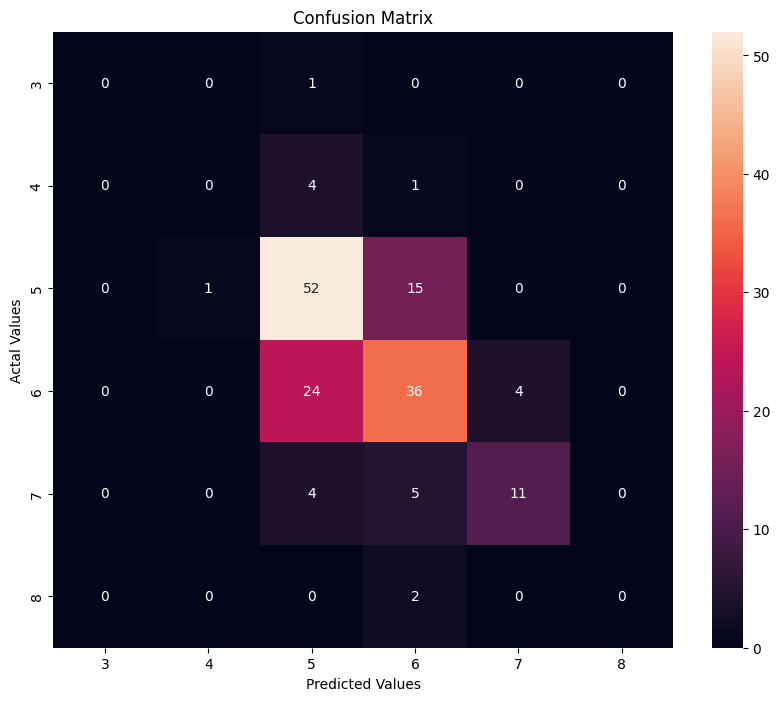

time: 265 ms (started: 2023-01-17 13:32:12 +03:00)


In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(cm,
                     index = [3,4,5,6,7,8], 
                     columns = [3,4,5,6,7,8])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 9.Conclusion

To summarize, we saw the data distribution and correlations with many visualization methods and made our inferences. We then normalized our dataset and neatly split it into train validation and testing. After this stage, we tested 8 models on validation, of which 6 are classification and 2 are regression models. We compared time and accuracy between them. As a result of these, we chose our best model as a random forest. We also tried the random forest model we chose on our test set and looked at our results. The results were as expected, with the effect of model distribution, there was a lot of bias on the 5 and 6 points. Therefore, our model had difficulty estimating the 3 and 8 scores. Still, the results were as expected. It was obvious that if we put our model in a binary classification as good wine and bad wine, not on points, it would give better accuracy results, but because we wanted it to predict full points, we followed such a path. As a result, we have seen again how effective the random forest is in this project and that it is a preferred model in classification problems. The results were satisfactory and it is possible to get better results with more data. Thanks to this project, we have seen that we can comment on the quality of the wine without tasting it.

# 10.References
1. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data 
mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-
553, 2009